In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.exponential import Exponential



In [2]:
# initialize jax RNG
key = jr.PRNGKey(0)

### One-dimensional Exponential distribution

In [11]:
# create an isotropic Gaussian
dim = 1
theta = np.zeros(1)
gamma = 2
dist = Exponential(theta=theta,gamma=gamma)

In [21]:
xmin = 0.001
xmax = 5
X = jnp.linspace(xmin, xmax, 1000)
Z = dist.batch(X[:,None])

0.6911472


Text(0.5, 1.0, 'Exp distribution with theta:0.0, gamma:2.0')

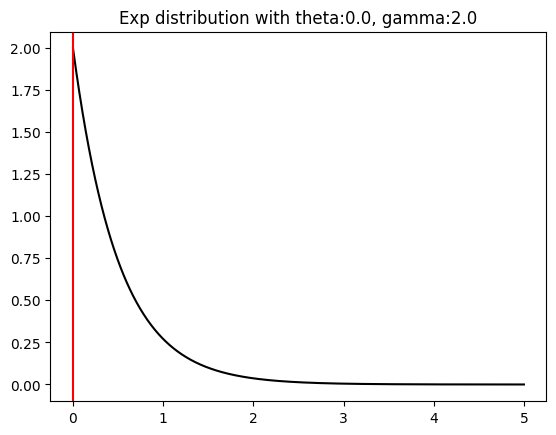

In [26]:
plt.plot(X,jnp.exp(Z),color = 'black')
plt.axvline(x=theta,ymin = 0,ymax = gamma+0.05,color='red')
plt.title(f"Exp distribution with theta:{theta[0]}, gamma:{gamma:.1f}")


### Two-dimensional Exponential Distribution

In [42]:
# create an isotropic Gaussian
dim = 2
theta = np.zeros(2)
gamma = 2
dist = Exponential(theta=theta,gamma=gamma)

In [50]:
xmin = 0.001;xmax = 5
ymin = 0.001;ymax = 5
npts = 100
X, Y = np.meshgrid(np.linspace(xmin, xmax, npts), np.linspace(ymin, ymax, npts), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
XY = jnp.stack([X_flat, Y_flat], axis=-1)
Z_flat = dist.batch(XY)
Z = Z_flat.reshape(X.shape)

In [74]:
# Draw samples
key, key_ = jr.split(key)
n_samples = 1000
samples = dist.sample(key, n_samples)

Text(0.5, 1.0, 'Exp distribution with theta:(0.0, 0.0), gamma:2.0')

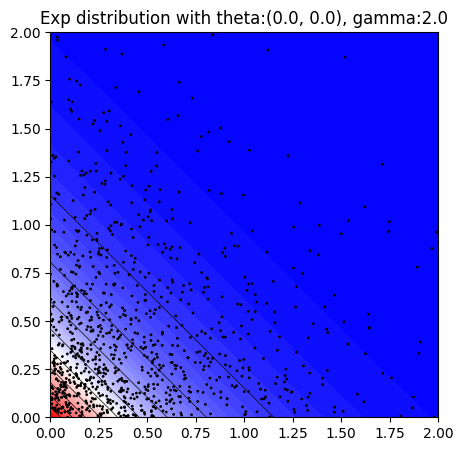

In [75]:
# Plot
plt.figure(figsize=(5,5))
plt.contour(X, Y, jnp.exp(Z), levels=10, colors='k', linewidths=0.5)
plt.contourf(X, Y, jnp.exp(Z), levels=50, cmap='bwr')
plt.scatter(samples[:,0], samples[:,1],color = 'black',marker='o',facecolors='none',s=1,linewidths=1)
plt.xlim(0,2)
plt.ylim(0,2)
plt.title(f"Exp distribution with theta:{theta[0], theta[1]}, gamma:{gamma:.1f}")
